In [1]:
import urllib, os, zipfile, glob
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
open('HillaryClinton.zip', 'wb').write(urllib.urlopen('https://github.com/ilyakats/CUNY-DATA620/blob/master/data/HillaryClinton.zip?raw=true').read())
open('DonaldTrump.zip', 'wb').write(urllib.urlopen('https://github.com/ilyakats/CUNY-DATA620/blob/master/data/DonaldTrump.zip?raw=true').read())

In [3]:
zip_ref = zipfile.ZipFile(os.path.realpath('HillaryClinton.zip'), 'r')
zip_ref.extractall(os.path.realpath(''))
zip_ref = zipfile.ZipFile(os.path.realpath('DonaldTrump.zip'), 'r')
zip_ref.extractall(os.path.realpath(''))
zip_ref.close()

In [4]:
os.unlink('DonaldTrump.zip')
os.unlink('HillaryClinton.zip')

In [5]:
read_files = glob.glob(os.path.realpath('DonaldTrump') + "\\*.txt")

with open("DonaldTrump.txt", "wb") as DonaldTrump:
    for f in read_files:
        with open(f, "rb") as infile:
            DonaldTrump.write(infile.read())

read_files = glob.glob(os.path.realpath('HillaryClinton') + "\\*.txt")

with open("HillaryClinton.txt", "wb") as HillaryClinton:
    for f in read_files:
        with open(f, "rb") as infile:
            HillaryClinton.write(infile.read())

In [6]:
import nltk

In [7]:
f = open('DonaldTrump.txt', 'rU')
DT_text = f.read()

f = open('HillaryClinton.txt', 'rU')
HC_text = f.read()

> #### 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

In [8]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
from collections import Counter

tokens = RegexpTokenizer(r'\w+').tokenize(HC_text)
lower_words = [w.lower() for w in tokens]
filtered_words = [word for word in lower_words if word not in stopwords.words('english')]
stemmed_words = [PorterStemmer().stem(word) for word in filtered_words]
HC_results = Counter(stemmed_words)    

In [9]:
print ('%d unique stemmed words' % len(HC_results))
pd.DataFrame(zip(HC_results.values(),HC_results.keys())).sort_values(by = [0], axis=0, ascending=False).head(10)

9700 unique stemmed words


,0,1
4170,3619,go
9576,3539,know
683,3516,peopl
2489,2838,work
108,2468,want
5784,2444,get
5229,2316,make
5667,2313,think
6920,2134,presid
4409,1812,need


In [10]:
tokens = RegexpTokenizer(r'\w+').tokenize(DT_text)
lower_words = [w.lower() for w in tokens]
filtered_words = [word for word in lower_words if word not in stopwords.words('english')]
stemmed_words = [PorterStemmer().stem(word) for word in filtered_words]
DT_results = Counter(stemmed_words) 

In [11]:
print ('%d unique stemmed words' % len(DT_results))
pd.DataFrame(zip(DT_results.values(),DT_results.keys())).sort_values(by = [0], axis=0, ascending=False).head(10)

5211 unique stemmed words


,0,1
3931,2258,go
1508,1432,peopl
811,1392,countri
3094,1316,american
3764,1162,clinton
2265,1130,applaus
1846,1075,hillari
4684,1034,job
1811,842,one
257,790,want


> #### 3.	Taking the most common words, how many unique words represent half of the total words in the corpus?

In [12]:
x = pd.DataFrame(zip(HC_results.keys(), HC_results.values()))
x.columns = ['word', 'counts']
x = x.sort_values(['counts'], ascending=[0])
x['cum_sum'] = x.counts.cumsum()
x['cum_perc'] = x.cum_sum/x.counts.sum()
HC_word_results = x
HC_word_results_top50 = HC_word_results[HC_word_results['cum_perc'] <= .50]

print ('%d unique stemmed words represent the top half of words in the corpus' % len(HC_word_results_top50))

224 unique stemmed words represent the top half of words in the corpus


In [13]:
x = pd.DataFrame(zip(DT_results.keys(), DT_results.values()))
x.columns = ['word', 'counts']
x = x.sort_values(['counts'], ascending=[0])
x['cum_sum'] = x.counts.cumsum()
x['cum_perc'] = x.cum_sum/x.counts.sum()
DT_word_results = x
DT_word_results_top50 = DT_word_results[DT_word_results['cum_perc'] <= .50]

print ('%d unique stemmed words represent the top half of words in the corpus' % len(DT_word_results_top50))

193 unique stemmed words represent the top half of words in the corpus


> #### 4. Identify the 200 highest frequency words in this corpus.

In [14]:
HC_word_results_top200 = HC_word_results.head(200)
DT_word_results_top200 = DT_word_results.head(200)

> #### 5. Create a graph that shows the relative frequency of these 200 words.

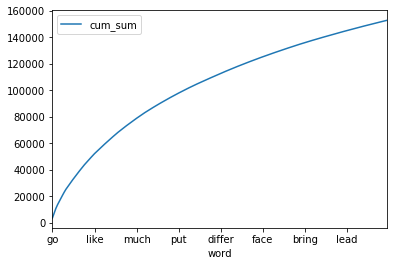

In [15]:
import matplotlib.pyplot as plt
HC_word_results_top200.plot( x = 'word', y = 'cum_sum')
plt.show()

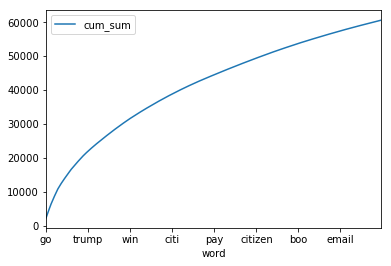

In [16]:
DT_word_results_top200.plot( x = 'word', y = 'cum_sum')
plt.show()

In [17]:
tokens = RegexpTokenizer(r'\w+').tokenize(HC_text)
text = nltk.Text(tokens)
text.concordance("Trump")

Displaying 25 of 367 matches:
re in this city and state Now Donald Trump s proposal to ban all Muslims from e
he no fly list STEPHANOPOULOS Donald Trump and yesterday Jerry Falwell Jr say t
ear about that STEPHANOPOULOS Donald Trump Last few days he s opened up you re 
 dear A new one huh begin video clip TRUMP She ll do a couple of minutes in Iow
sing A lot of the others are kind of Trump 2 you know Oh whatever Trump says ma
kind of Trump 2 you know Oh whatever Trump says maybe we won t go quite as far 
publican caucuses just behind Donald Trump and Ted Cruz Ted Cruz won Iowa What 
y interview this morning with Donald Trump in just a few minutes But we re goin
opponent you may face That is Donald Trump You got into a pretty ugly exchange 
I want to talk about an issue Donald Trump wanted to make an issue in this camp
sault What s your response to Donald Trump CLINTON I have no response I m going
A I have a few more questions Donald Trump was on The Tonight Show and asked ab
are headin

In [18]:
tokens = RegexpTokenizer(r'\w+').tokenize(DT_text)
text = nltk.Text(tokens)
text.concordance("Clinton")

Displaying 25 of 1100 matches:
 nation But the legacy of the Obama Clinton interventions will be weakness conf
a won t even name the enemy Hillary Clinton also refuses to say the words radic
ncrease in refugees After Secretary Clinton s failed intervention in Libya Isla
of taking charge that night Hillary Clinton decided to go home and sleep Incred
ded to go home and sleep Incredible Clinton blames it all on a video an excuse 
 With President Obama and Secretary Clinton we ve had the exact opposite a reck
egic foreign policy vision of Obama Clinton it has been a complete and total di
ginia All over Ohio because Hillary Clinton made the statement not so long ago 
ne of the donors of crooked Hillary Clinton doesn t want that to happen even th
ince NAFTA NAFTA was signed by Bill Clinton and I believe it s the single worst
ew York is a disaster which Hillary Clinton said that she was going to fix OK s
his story they talked about Hillary Clinton It was a headline Hillary Clinton a
y Clinton